In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Feature Scaling

In [13]:
# Standardization

data = titanic_data [['age','fare','pclass']]
data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [14]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.53037664, -0.50244517,  0.82737724],
       [ 0.57183099,  0.78684529, -1.56610693],
       [-0.25482473, -0.48885426,  0.82737724],
       ...,
       [        nan, -0.17626324,  0.82737724],
       [-0.25482473, -0.04438104, -1.56610693],
       [ 0.15850313, -0.49237783,  0.82737724]])

In [16]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377
...,...,...,...
886,-0.185937,-0.386671,-0.369365
887,-0.737041,-0.044381,-1.566107
888,NaN,-0.176263,0.827377
889,-0.254825,-0.044381,-1.566107


<AxesSubplot:xlabel='age', ylabel='Density'>

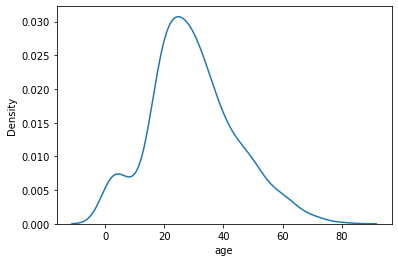

In [17]:
sns.kdeplot(titanic_data.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

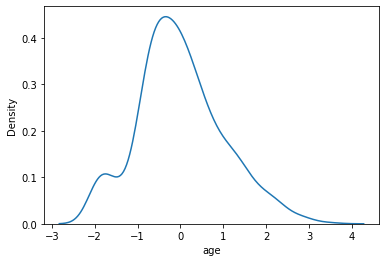

In [18]:
sns.kdeplot(scaled_data.age)

In [19]:
# 2. MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)
scaled = pd.DataFrame(scaled,columns=data.columns)
scaled

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0
...,...,...,...
886,0.334004,0.025374,0.5
887,0.233476,0.058556,0.0
888,NaN,0.045771,1.0
889,0.321438,0.058556,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

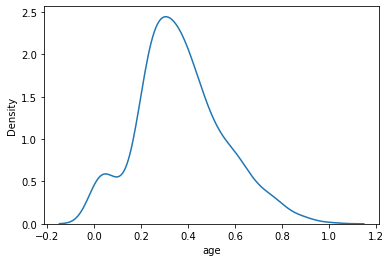

In [21]:
sns.kdeplot(scaled.age)

In [22]:
# 3. Mean Normalization
data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [23]:
mean_vals = data.mean(axis=0)
range_vals = data.max(axis=0)-data.min(axis=0)
mean_vals,range_vals

(age       29.699118
 fare      32.204208
 pclass     2.308642
 dtype: float64,
 age        79.5800
 fare      512.3292
 pclass      2.0000
 dtype: float64)

In [24]:
scaled = (data-mean_vals)/range_vals
scaled.head()

,age,fare,pclass
0,-0.096747,-0.048707,0.345679
1,0.104309,0.076277,-0.654321
2,-0.046483,-0.047390,0.345679
3,0.066611,0.040786,-0.654321
4,0.066611,-0.047146,0.345679


<AxesSubplot:xlabel='age', ylabel='Density'>

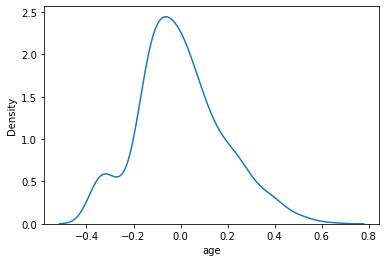

In [25]:
sns.kdeplot(scaled.age)

# Handling Missing Values

In [5]:
# Check for missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [43]:
data = titanic_data[['age','fare','pclass']]
data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [44]:
data.age.mean()

29.69911764705882

In [45]:
data.age.isna().sum()

177

## Imputation
    Imputation is a technique to handle/ replace missing values with a valu, like mean imputation, median imputation, mode imputation or zero imputation, replace the missing values with zero.

In [46]:
# Mean imputation

mean = data.age.mean()

data['Mean_age'] = data.age.fillna(mean)
data.head()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_2720\411304793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mean_age'] = data.age.fillna(mean)


,age,fare,pclass,Mean_age
0,22.0,7.2500,3,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,3,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,3,35.0


In [47]:
data.age.mean(),data.Mean_age.mean()

(29.69911764705882, 29.69911764705882)

In [48]:
data.Mean_age.isna().sum()

0

In [51]:
median = data.age.median()

data['Median_age'] = data.age.fillna(median)

data.head(20)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_2720\677541561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Median_age'] = data.age.fillna(median)


,age,fare,pclass,Mean_age,Median_age
0,22.0,7.2500,3,22.000000,22.0
1,38.0,71.2833,1,38.000000,38.0
2,26.0,7.9250,3,26.000000,26.0
3,35.0,53.1000,1,35.000000,35.0
4,35.0,8.0500,3,35.000000,35.0
5,NaN,8.4583,3,29.699118,28.0
6,54.0,51.8625,1,54.000000,54.0
7,2.0,21.0750,3,2.000000,2.0
8,27.0,11.1333,3,27.000000,27.0
9,14.0,30.0708,2,14.000000,14.0


In [52]:
data.age.median()

28.0

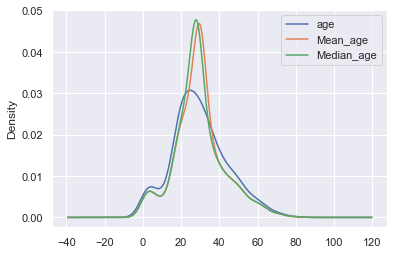

In [57]:
import matplotlib.pyplot as plt
sns.set_theme()
fig = plt.figure()
ax = fig.add_subplot(111)

data.age.plot(kind='kde',ax=ax)
data.Mean_age.plot(kind='kde',ax=ax)
data.Median_age.plot(kind='kde',ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [58]:
# 2. End of Distribution Imputation

data = titanic_data[['survived','pclass','age','fare']]

data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

<AxesSubplot:>

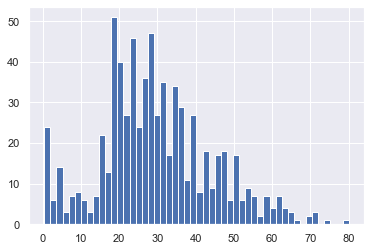

In [59]:
data.age.hist(bins=50)

In [61]:
eod_value = data.age.mean() + 3 * data.age.std()
eod_value

73.27860964406094

In [63]:
data['eod_age'] = data.age.fillna(eod_value)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_2720\291213718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eod_age'] = data.age.fillna(eod_value)


In [64]:
data.head()

,survived,pclass,age,fare,eod_age
0,0,3,22.0,7.2500,22.0
1,1,1,38.0,71.2833,38.0
2,1,3,26.0,7.9250,26.0
3,1,1,35.0,53.1000,35.0
4,0,3,35.0,8.0500,35.0


In [68]:
type(data.age),type(data.eod_age)

(pandas.core.series.Series, pandas.core.series.Series)

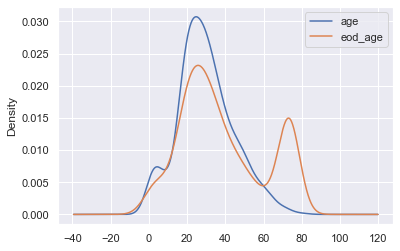

In [71]:
fig = plt.figure()
ax = plt.subplot(111)

data.age.plot(kind='kde',ax=ax)
data.eod_age.plot(kind='kde',ax=ax)

lines,legends = ax.get_legend_handles_labels()
ax.legend(lines,legends,loc='best')

## Handling Missing Categorical Data

In [74]:
# Frequent Category imputation
data = titanic_data[['age','fare','embark_town']]
data.head()

,age,fare,embark_town
0,22.0,7.2500,Southampton
1,38.0,71.2833,Cherbourg
2,26.0,7.9250,Southampton
3,35.0,53.1000,Southampton
4,35.0,8.0500,Southampton


In [75]:
data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

Text(0, 0.5, 'Number of pessengers')

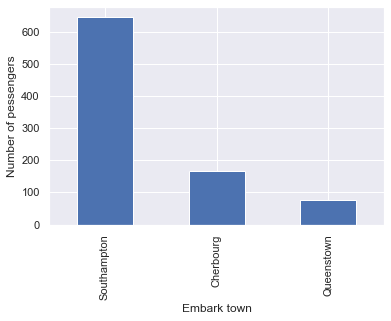

In [76]:
data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark town")
plt.ylabel('Number of pessengers')

In [77]:
data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [78]:
# To be continued

# Categorical Data Encoding

In [79]:
# 1. One Hot Encoding
data =  titanic_data[['sex','class','embark_town']]
data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [80]:
pd.concat([data.sex,pd.get_dummies(data.sex)],axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [84]:
pd.concat([data['class'],pd.get_dummies(data['class'])],axis=1)

,class,First,Second,Third
0,Third,0,0,1
1,First,1,0,0
2,Third,0,0,1
3,First,1,0,0
4,Third,0,0,1
...,...,...,...,...
886,Second,0,1,0
887,First,1,0,0
888,Third,0,0,1
889,First,1,0,0


In [87]:
# 2. Label Encoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['class'])

data['le_class'] = le.fit_transform(data['class'])

data.head()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_2720\1341508505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['le_class'] = le.fit_transform(data['class'])


,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


In [88]:
data.le_class.unique()

array([2, 0, 1])

In [91]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

## Discretization

In [92]:
# To be practiced some other time

# Handling Outliers

In [93]:
data = titanic_data[['age','fare','pclass']]
data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


<AxesSubplot:ylabel='age'>

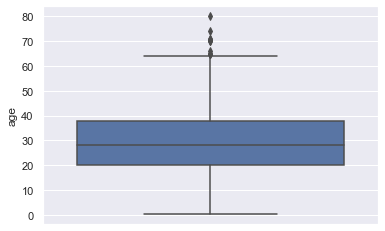

In [94]:
sns.boxplot(y='age',data = data)

### Outlier Clipping

In [107]:
# 1. Clipping Outliers using IQR

IQR = data.age.quantile(0.75)-data.age.quantile(0.25)

lower_limit = data.age.quantile(0.25)-(1.5*IQR)
upper_limit = data.age.quantile(0.75)+(1.5*IQR)
lower_limit,upper_limit

(-6.6875, 64.8125)

In [108]:
age_outliers = np.where(data.age>upper_limit,True,np.where(data.age<lower_limit,True,False))

In [109]:
data_without_outliers = data.loc[~(age_outliers),]

<AxesSubplot:ylabel='age'>

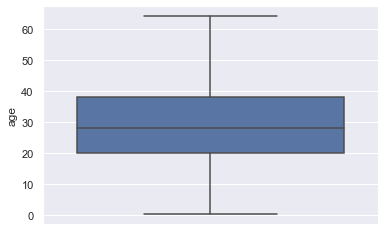

In [110]:
sns.boxplot(y='age',data=data_without_outliers)

### Trimming Outliers Using mean and std

In [111]:
# 2. Outlier Trimming using Mean and Std
lower_limit = data.age.mean()-(3*data.age.std())
upper_limit = data.age.mean()+(3*data.age.std())

In [112]:
age_outliers = np.where(data.age>upper_limit,True,np.where(data.age<lower_limit,True,False))

In [113]:
data_without_outliers = data.loc[~(age_outliers),]

<AxesSubplot:ylabel='age'>

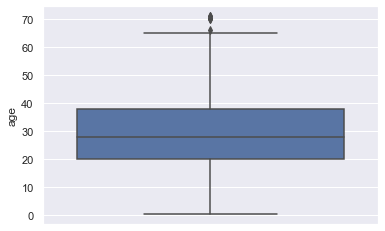

In [114]:
sns.boxplot(y='age',data=data_without_outliers)